In [1]:
%pylab inline
import pandas as pd
dfr = pd.read_csv('../datasets/loanf.csv')
dfr.head()

Populating the interactive namespace from numpy and matplotlib


,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [2]:
dfr['TF'] = dfr['Interest.Rate']<=12
dfr.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [3]:
d = dfr[dfr['Interest.Rate']==10]
d.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
650,10.0,700,36,3250.00,2800,True
204,10.0,715,36,15416.67,6000,True
440,10.0,730,36,6250.00,21000,True
521,10.0,715,36,5000.00,12000,True
1017,10.0,735,60,4000.00,5000,True


In [5]:
import statsmodels.api as sm
dfr['intercept'] = 1.0
# identify the independent variables
ind_cols = ['FICO.Score', 'Loan.Amount', 'intercept']
logit = sm.Logit(dfr['TF'], dfr[ind_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8


In [13]:
# get the fitted coefficients from the results
coeff = result.params
print(coeff)

FICO.Score      0.087423
Loan.Amount    -0.000174
intercept     -60.125045
dtype: float64


In [10]:
## take the coefficients from the trained model and create the equation
def pz(fico,amt,coeff):
    z = coeff[0]*fico + coeff[1]*amt + coeff[2]
    return 1/(1 + exp(-1*z))

In [11]:
pz(720,10000,coeff)

0.7463785889515134

In [14]:
print("Trying multiple FICO Loan Amount combinations: ")
print('----')
print("fico=820, amt=50,000")
print(pz(820,50000,coeff))
print("fico=820, amt=60,000")
print(pz(820,60000,coeff))
print("fico=820, amt=70,000")
print(pz(820,70000,coeff))
print("fico=820, amt=63,000")
print(pz(820,63000,coeff))
print("fico=820, amt=65,000")
print(pz(820,65000,coeff))

Trying multiple FICO Loan Amount combinations: 
----
fico=820, amt=50,000
0.945863681760546
fico=820, amt=60,000
0.7540468640846435
fico=820, amt=70,000
0.3497891459574514
fico=820, amt=63,000
0.64525116319289
fico=820, amt=65,000
0.5622192463285381


The threshold for our confidence in receiving an interest rate of <12% with a FICO score of 820 occurs somewhere between a loan amount of 60,000 and 63,000 dollars. After we hit the threshold, our probability of receiving a desirable interest rate quickly decreases.

In [17]:
from numpy import *
import matplotlib.pyplot as plt

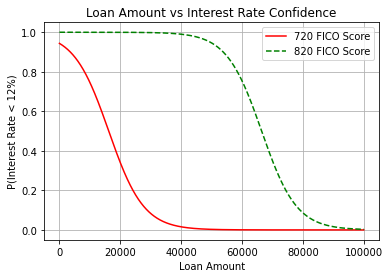

In [27]:
x = arange(0., 100000, 1.)
y1 = pz(720, x, coeff)
y2 = pz(820, x, coeff)
l1 = plt.plot(x,y1,'r-',label='720 FICO Score')
l2 = plt.plot(x,y2,'g--',label='820 FICO Score')
ll = plt.legend(loc='upper right')
xl = plt.xlabel('Loan Amount')
yl = plt.ylabel('P(Interest Rate < 12%)')
ttl = plt.title('Loan Amount vs Interest Rate Confidence')
grd = plt.grid(True)
plt.show()